In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#data source: https://www.bgc-jena.mpg.de/wetter/

df = pd.read_csv("weather.csv")

In [3]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m≤),PAR (µmol/m≤/s),max. PAR (µmol/m≤/s),Tlog (degC),CO2 (ppm)
0,01.07.2020 00:10:00,983.85,16.17,290.67,10.63,69.68,18.41,12.83,5.58,8.15,...,1.27,2.12,194.0,0.0,0,0.0,0.0,0.0,25.08,422.1
1,01.07.2020 00:20:00,983.72,15.90,290.41,10.66,71.02,18.09,12.85,5.24,8.17,...,1.91,2.84,197.1,0.0,0,0.0,0.0,0.0,25.03,422.9
2,01.07.2020 00:30:00,983.65,15.69,290.21,10.65,71.92,17.85,12.84,5.01,8.16,...,1.30,2.05,213.3,0.0,0,0.0,0.0,0.0,24.97,423.8
3,01.07.2020 00:40:00,983.58,15.56,290.08,10.68,72.68,17.70,12.87,4.84,8.18,...,1.20,2.16,222.9,0.0,0,0.0,0.0,0.0,24.90,424.6
4,01.07.2020 00:50:00,983.58,15.64,290.16,10.68,72.31,17.80,12.87,4.93,8.18,...,0.89,2.60,220.3,0.0,0,0.0,0.0,0.0,24.83,423.5


In [4]:
df.shape

(14031, 22)

In [5]:
#subsampling the dataset from 10-min intervals to 1-hour intervals:

df = df[5::6].reset_index(drop=True)

In [6]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m≤),PAR (µmol/m≤/s),max. PAR (µmol/m≤/s),Tlog (degC),CO2 (ppm)
0,01.07.2020 01:00:00,983.48,15.55,290.08,10.71,72.88,17.69,12.89,4.80,8.20,...,0.85,1.84,205.9,0.0,0,0.00,0.00,0.00,24.77,425.0
1,01.07.2020 02:00:00,983.35,15.48,290.02,10.88,74.02,17.61,13.04,4.58,8.29,...,1.77,2.46,214.4,0.0,0,0.00,0.00,0.00,24.46,428.0
2,01.07.2020 03:00:00,983.21,15.50,290.05,10.97,74.38,17.64,13.12,4.52,8.34,...,1.37,2.68,212.4,0.0,0,0.00,0.00,0.00,24.18,425.3
3,01.07.2020 04:00:00,983.22,15.74,290.29,11.02,73.48,17.91,13.16,4.75,8.37,...,1.74,2.43,202.7,0.0,0,0.00,5.09,7.45,24.00,422.4
4,01.07.2020 05:00:00,983.32,15.86,290.40,11.28,74.19,18.05,13.39,4.66,8.51,...,1.68,2.51,204.4,0.0,0,49.51,91.06,103.73,24.24,428.8


In [7]:
df_uni = df[['Date Time', 'T (degC)']]

In [8]:
df_uni.head()

,Date Time,T (degC)
0,01.07.2020 01:00:00,15.55
1,01.07.2020 02:00:00,15.48
2,01.07.2020 03:00:00,15.50
3,01.07.2020 04:00:00,15.74
4,01.07.2020 05:00:00,15.86


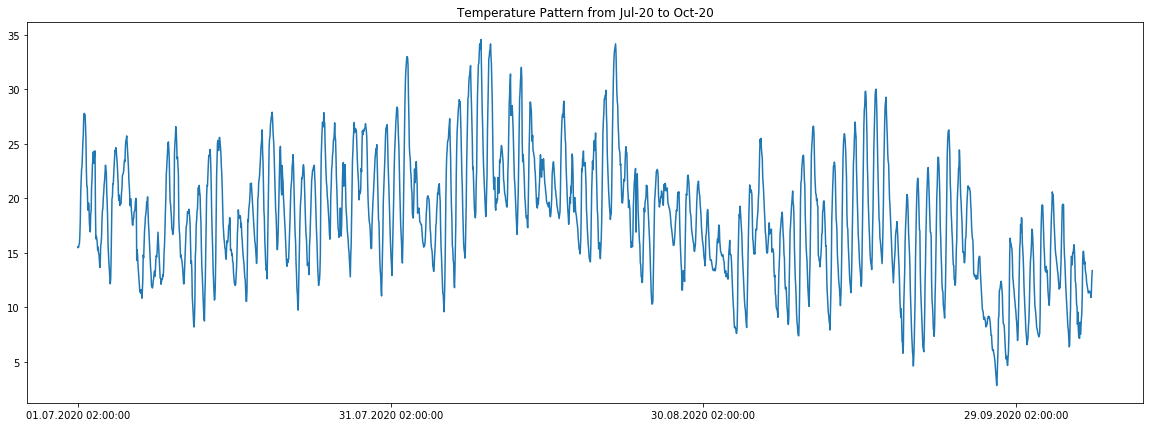

In [9]:
#visualise the dataset

plt.figure(figsize=(20,7))
ax = plt.subplot()

plt.plot(df_uni['Date Time'], df_uni['T (degC)'])
ax.set_xticks(list(range(1,df_uni.shape[0],30*24)))
plt.title("Temperature Pattern from Jul-20 to Oct-20")
plt.show()

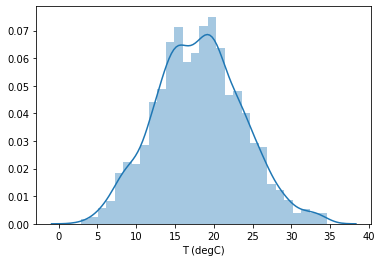

In [10]:
#check data distribution

sns.distplot(df_uni['T (degC)'])

In [11]:
#1. Data Preparation

In [12]:
#create a function to split the sequence

def split_sequence(sequence, n_steps):
    x, y = list(), list()
    for i in range(len(sequence)):
        end = i + n_steps
        if end > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end], sequence[end]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

In [13]:
df_uni.shape

(2338, 2)

In [14]:
#split the dataset to train and test set (without shuffling)

train_df = df_uni.iloc[:1636, :]
test_df = df_uni.iloc[1636:, :]


In [15]:
#convert to array

train_temp = np.array(train_df['T (degC)']).reshape(-1,1)
test_temp = np.array(test_df['T (degC)']).reshape(-1,1)

In [16]:
#scale the dataset to range = (0,1)

from sklearn.preprocessing import MinMaxScaler

mn = MinMaxScaler()

mn.fit(train_temp)
train_temp = mn.transform(train_temp)
test_temp = mn.transform(test_temp)

In [17]:
#split the sequence of train and test df

n_steps = 24 #1-day interval

x_train, y_train = split_sequence(train_temp, n_steps)
x_test, y_test = split_sequence(test_temp, n_steps)

In [20]:
#2. Neural Network Models
#2.1. Vanilla LSTM
#2.2. Stacked LSTM
#2.3. Bidirectional LSTM

In [21]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, Bidirectional, GRU
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
#reshape the x array to [samples, timesteps, features]

n_features = 1

#x_train = x_train.reshape(x_train.shape[0], n_steps, n_features)
#x_test = x_test.reshape(x_test.shape[0], n_steps, n_features)

In [ ]:
#2.1. Vanilla LSTM

In [23]:
lstm = Sequential()

lstm.add(LSTM(64, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (n_steps, n_features)))
lstm.add(Dense(1))
lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                16896     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


In [24]:
lstm.compile(optimizer='adam', loss = 'mse', metrics=['mae'])

In [25]:
epochs = 50
batch_size = 64
es = EarlyStopping(monitor='val_loss', patience=5)

history = lstm.fit(x_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, 
                   callbacks=[es], verbose=2)

loss_train, acc_train = lstm.evaluate(x_train, y_train)
loss_test, acc_test = lstm.evaluate(x_test, y_test)

Epoch 1/50
21/21 - 1s - loss: 0.0191 - mae: 0.1102 - val_loss: 0.0083 - val_mae: 0.0787
Epoch 2/50
21/21 - 0s - loss: 0.0067 - mae: 0.0648 - val_loss: 0.0040 - val_mae: 0.0537
Epoch 3/50
21/21 - 0s - loss: 0.0030 - mae: 0.0419 - val_loss: 0.0020 - val_mae: 0.0371
Epoch 4/50
21/21 - 0s - loss: 0.0019 - mae: 0.0323 - val_loss: 0.0015 - val_mae: 0.0300
Epoch 5/50
21/21 - 0s - loss: 0.0016 - mae: 0.0300 - val_loss: 0.0012 - val_mae: 0.0262
Epoch 6/50
21/21 - 0s - loss: 0.0015 - mae: 0.0287 - val_loss: 0.0013 - val_mae: 0.0279
Epoch 7/50
21/21 - 0s - loss: 0.0015 - mae: 0.0285 - val_loss: 0.0011 - val_mae: 0.0250
Epoch 8/50
21/21 - 0s - loss: 0.0014 - mae: 0.0270 - val_loss: 0.0011 - val_mae: 0.0260
Epoch 9/50
21/21 - 0s - loss: 0.0014 - mae: 0.0270 - val_loss: 9.3977e-04 - val_mae: 0.0233
Epoch 10/50
21/21 - 0s - loss: 0.0013 - mae: 0.0259 - val_loss: 9.3368e-04 - val_mae: 0.0233
Epoch 11/50
21/21 - 0s - loss: 0.0013 - mae: 0.0267 - val_loss: 9.9037e-04 - val_mae: 0.0237
Epoch 12/50
21/21 

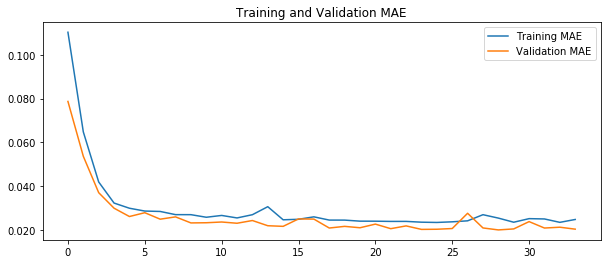

In [26]:
from matplotlib.ticker import FormatStrFormatter

plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.legend(['Training MAE', 'Validation MAE'])
plt.title('Training and Validation MAE')
plt.show()

In [ ]:
#2.2. Stacked LSTM

In [27]:
lstm2 = Sequential()

lstm2.add(LSTM(64, activation = 'relu', kernel_initializer = 'he_normal', input_shape = (n_steps, n_features), 
               return_sequences=True))
lstm2.add(LSTM(32, activation = 'relu', kernel_initializer = 'he_normal'))
lstm2.add(Dense(1))
lstm2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 24, 64)            16896     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [28]:
lstm2.compile(optimizer='adam', loss = 'mse', metrics=['mae'])

In [29]:
history2 = lstm2.fit(x_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, 
                    callbacks=[es], verbose=2)

loss_train, acc_train = lstm2.evaluate(x_train, y_train)
loss_test, acc_test = lstm2.evaluate(x_test, y_test)

Epoch 1/50
21/21 - 1s - loss: 0.2594 - mae: 0.3296 - val_loss: 0.0182 - val_mae: 0.1018
Epoch 2/50
21/21 - 1s - loss: 0.0250 - mae: 0.1312 - val_loss: 0.0125 - val_mae: 0.0849
Epoch 3/50
21/21 - 1s - loss: 0.0153 - mae: 0.1004 - val_loss: 0.0074 - val_mae: 0.0675
Epoch 4/50
21/21 - 1s - loss: 0.0071 - mae: 0.0680 - val_loss: 0.0046 - val_mae: 0.0525
Epoch 5/50
21/21 - 0s - loss: 0.0047 - mae: 0.0540 - val_loss: 0.0035 - val_mae: 0.0450
Epoch 6/50
21/21 - 0s - loss: 0.0037 - mae: 0.0470 - val_loss: 0.0027 - val_mae: 0.0400
Epoch 7/50
21/21 - 1s - loss: 0.0029 - mae: 0.0404 - val_loss: 0.0021 - val_mae: 0.0348
Epoch 8/50
21/21 - 0s - loss: 0.0025 - mae: 0.0371 - val_loss: 0.0020 - val_mae: 0.0343
Epoch 9/50
21/21 - 0s - loss: 0.0022 - mae: 0.0347 - val_loss: 0.0018 - val_mae: 0.0320
Epoch 10/50
21/21 - 1s - loss: 0.0021 - mae: 0.0338 - val_loss: 0.0017 - val_mae: 0.0309
Epoch 11/50
21/21 - 1s - loss: 0.0018 - mae: 0.0318 - val_loss: 0.0016 - val_mae: 0.0293
Epoch 12/50
21/21 - 0s - loss:

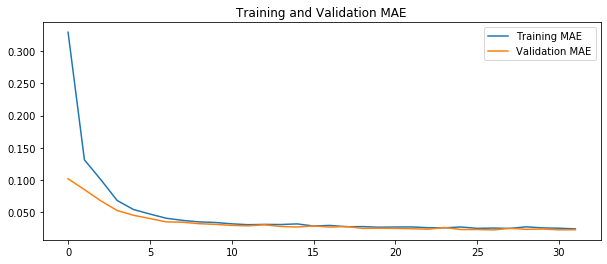

In [30]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.plot(history2.history['mae'])
plt.plot(history2.history['val_mae'])
plt.legend(['Training MAE', 'Validation MAE'])
plt.title('Training and Validation MAE')
plt.show()

In [ ]:
#2.3. Bidirectional LSTM

In [31]:
lstm3 = Sequential()

lstm3.add(Bidirectional(LSTM(64, activation = 'relu', kernel_initializer = 'he_normal',
                             input_shape = (n_steps, n_features))))
lstm3.add(Dense(1))

In [32]:
lstm3.compile(optimizer='adam', loss = 'mse', metrics=['mae'])

In [33]:
history3 = lstm3.fit(x_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, 
                    callbacks=[es], verbose=2)

loss_train, acc_train = lstm3.evaluate(x_train, y_train)
loss_test, acc_test = lstm3.evaluate(x_test, y_test)

Epoch 1/50
21/21 - 1s - loss: 0.1214 - mae: 0.2613 - val_loss: 0.0156 - val_mae: 0.0943
Epoch 2/50
21/21 - 0s - loss: 0.0225 - mae: 0.1219 - val_loss: 0.0073 - val_mae: 0.0653
Epoch 3/50
21/21 - 0s - loss: 0.0099 - mae: 0.0794 - val_loss: 0.0061 - val_mae: 0.0592
Epoch 4/50
21/21 - 1s - loss: 0.0067 - mae: 0.0654 - val_loss: 0.0036 - val_mae: 0.0483
Epoch 5/50
21/21 - 0s - loss: 0.0050 - mae: 0.0548 - val_loss: 0.0029 - val_mae: 0.0442
Epoch 6/50
21/21 - 0s - loss: 0.0041 - mae: 0.0500 - val_loss: 0.0022 - val_mae: 0.0385
Epoch 7/50
21/21 - 0s - loss: 0.0032 - mae: 0.0430 - val_loss: 0.0020 - val_mae: 0.0354
Epoch 8/50
21/21 - 0s - loss: 0.0028 - mae: 0.0396 - val_loss: 0.0021 - val_mae: 0.0358
Epoch 9/50
21/21 - 0s - loss: 0.0029 - mae: 0.0408 - val_loss: 0.0017 - val_mae: 0.0331
Epoch 10/50
21/21 - 0s - loss: 0.0024 - mae: 0.0363 - val_loss: 0.0014 - val_mae: 0.0288
Epoch 11/50
21/21 - 0s - loss: 0.0020 - mae: 0.0323 - val_loss: 0.0012 - val_mae: 0.0267
Epoch 12/50
21/21 - 0s - loss:

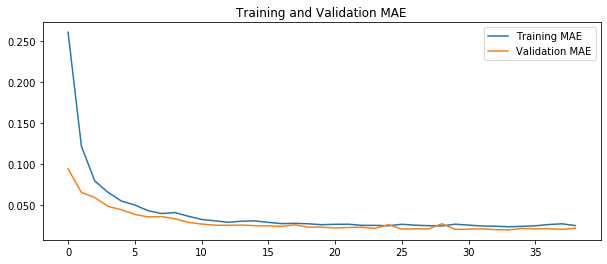

In [34]:
plt.figure(figsize=(10,4))
ax = plt.subplot()

ax.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.plot(history3.history['mae'])
plt.plot(history3.history['val_mae'])
plt.legend(['Training MAE', 'Validation MAE'])
plt.title('Training and Validation MAE')
plt.show()